<a href="https://colab.research.google.com/github/NitinSheshma/Annual-Aggregated-Country-Road-Mileage/blob/main/python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# 1. Load the dataset
df = pd.read_csv("/cleaned_python_ca2_dataset.csv")
print(df.head())
print(df.tail())
print(df.describe())
print(df.columns)
print(df.dropna())


   calendar_year  county_order_number county_name  jurisdiction  \
0           2020                    1       Adams             5   
1           2020                    1       Adams             5   
2           2020                    1       Adams             5   
3           2020                    1       Adams             5   
4           2020                    1       Adams             5   

   function_class function_class_description thru_lane_surface  is_paved  \
0               7      Rural Major Collector               ACP      True   
1               7      Rural Major Collector               ACP      True   
2               7      Rural Major Collector               BST      True   
3               7      Rural Major Collector               BST      True   
4               7      Rural Major Collector               BST      True   

     truck_route_description  is_fgts  is_cfgs  total_lane_miles  \
0  T3 - 300,000 to 4,000,000     True     True            62.454   
1   

In [ ]:
# 2. Clean column names
df.columns = df.columns.str.strip().str.lower()

In [ ]:
# 3. Drop rows with missing values
df = df.dropna()

In [ ]:
# 4. Set correct column names
county_col = 'county_name'
mileage_col = 'total_centerline_miles'
year_col = 'calendar_year'
paved_col = 'is_paved'

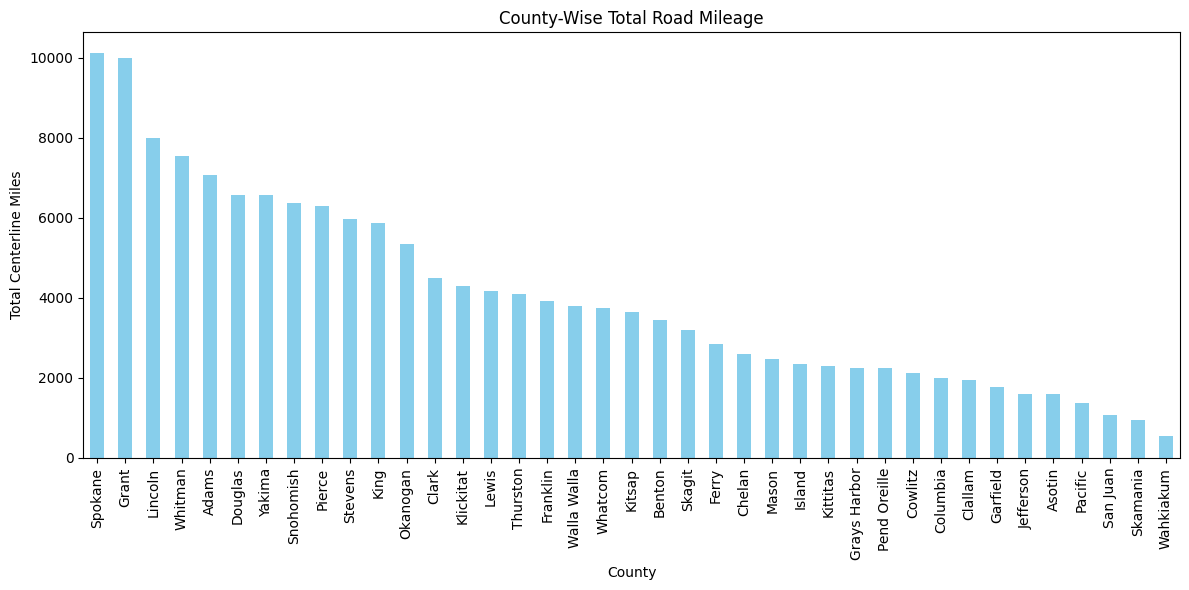

In [ ]:
# -- Chart 1: County-Wise Road Distribution – Bar Chart --
county_mileage = df.groupby(county_col)[mileage_col].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
county_mileage.plot(kind='bar', color='skyblue')
plt.title('County-Wise Total Road Mileage')
plt.xlabel('County')
plt.ylabel('Total Centerline Miles')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

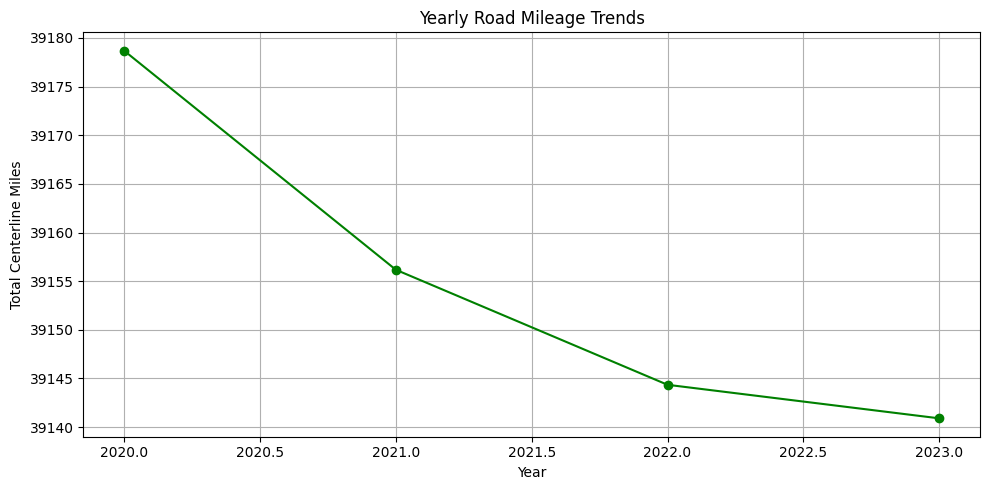

In [ ]:
# -- Chart 2: Yearly Road Mileage Trends – Line Chart --
yearly_mileage = df.groupby(year_col)[mileage_col].sum()

plt.figure(figsize=(10,5))
yearly_mileage.plot(kind='line', marker='o', color='green')
plt.title('Yearly Road Mileage Trends')
plt.xlabel('Year')
plt.ylabel('Total Centerline Miles')
plt.grid(True)
plt.tight_layout()
plt.show()

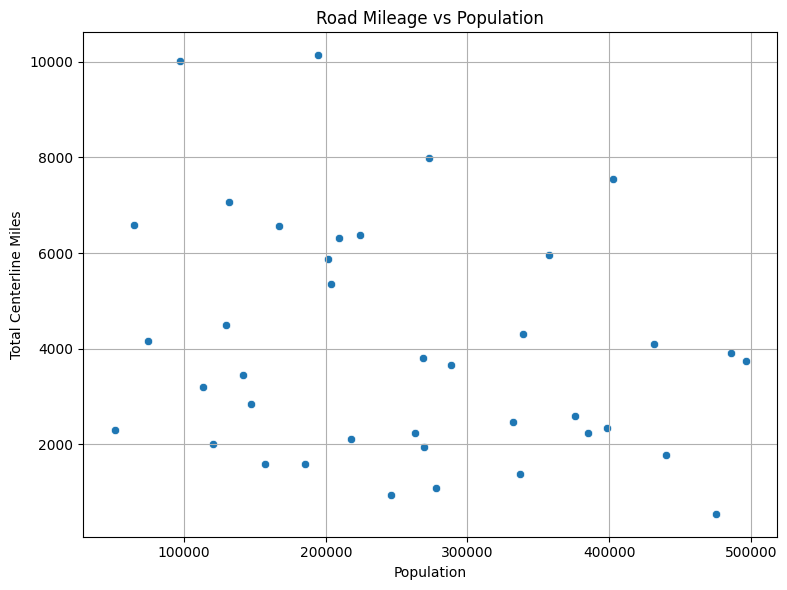

In [ ]:
# -- Chart 3: Road Mileage Density per Population – Scatter Plot --
np.random.seed(42)
population = pd.Series(
    np.random.randint(10000, 500000, size=df[county_col].nunique()),
    index=df[county_col].unique()
)

df['population'] = df[county_col].map(population)

county_stats = df.groupby(county_col).agg({
    mileage_col: 'sum',
    'population': 'mean'
}).reset_index()

plt.figure(figsize=(8,6))
sns.scatterplot(data=county_stats, x='population', y=mileage_col)
plt.title('Road Mileage vs Population')
plt.xlabel('Population')
plt.ylabel('Total Centerline Miles')
plt.grid(True)
plt.tight_layout()
plt.show()

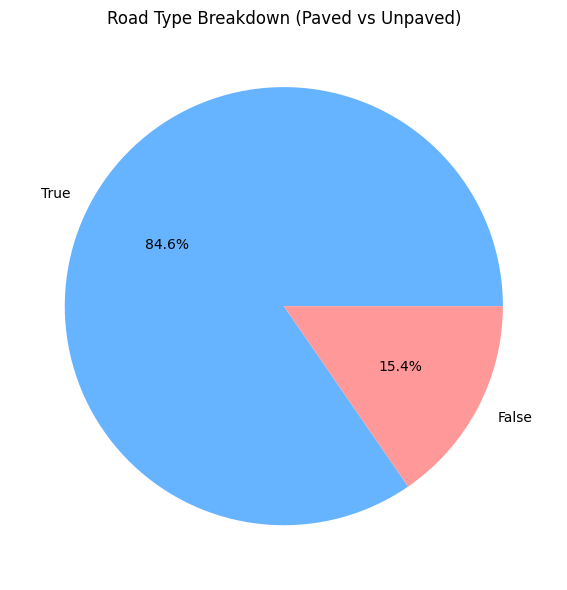

In [ ]:
# -- Chart 4: Road Type Breakdown (Paved vs Unpaved) – Pie Chart --
paved_counts = df[paved_col].value_counts()

plt.figure(figsize=(6,6))
paved_counts.plot(kind='pie', autopct='%1.1f%%', labels=paved_counts.index, colors=['#66b3ff','#ff9999'])
plt.title('Road Type Breakdown (Paved vs Unpaved)')
plt.ylabel('')
plt.tight_layout()
plt.show()

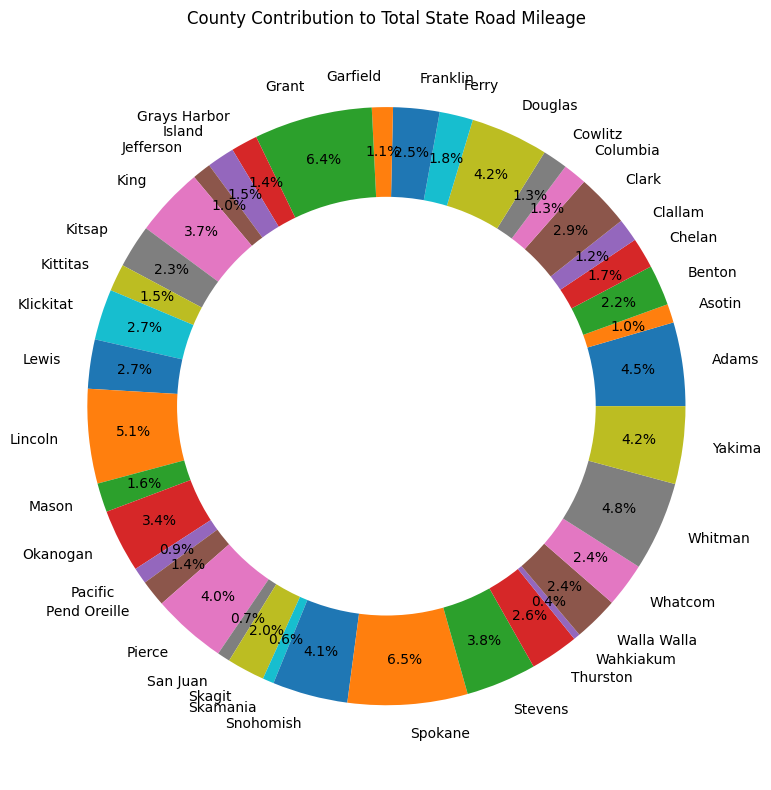

In [ ]:
# -- Chart 5: State vs. County Road Mileage Comparison – Donut Chart --
county_totals = df.groupby(county_col)[mileage_col].sum()

plt.figure(figsize=(8,8))
plt.pie(county_totals, labels=county_totals.index, autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('County Contribution to Total State Road Mileage')
plt.tight_layout()
plt.show()